# PCA

In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [217]:
f = open('testSet.txt')
dataset = []
for line in f.readlines():
    dataset.append([float(i) for i in line.split('\t')])
dataset = np.array(dataset)

In [218]:
dataset[:10]

array([[ 10.235186,  11.321997],
       [ 10.122339,  11.810993],
       [  9.190236,   8.904943],
       [  9.306371,   9.847394],
       [  8.330131,   8.340352],
       [ 10.152785,  10.123532],
       [ 10.40854 ,  10.821986],
       [  9.003615,  10.039206],
       [  9.534872,  10.096991],
       [  9.498181,  10.825446]])

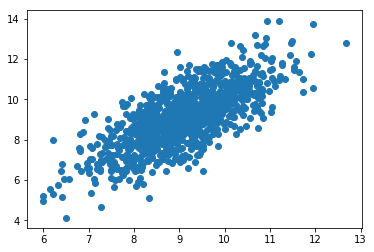

In [219]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

In [220]:
mean_val = dataset.mean(axis=0)
cov_mat = np.cov(dataset - mean_val, rowvar=0)

In [221]:
cov_mat

array([[ 1.05198368,  1.1246314 ],
       [ 1.1246314 ,  2.21166499]])

In [222]:
eig_vals, eig_vector = np.linalg.eig(cov_mat)

In [223]:
eig_vector

array([[-0.85389096, -0.52045195],
       [ 0.52045195, -0.85389096]])

In [224]:
eig_vals

array([ 0.36651371,  2.89713496])

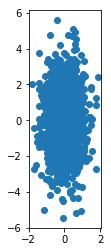

In [225]:
new_dataset = np.matmul(dataset - mean_val, eig_vector) #map to the new space
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_dataset[:, 0], new_dataset[:, 1])
ax.set_aspect(1)
plt.show()

In [226]:
np.cov(new_dataset, rowvar=0)

array([[  3.66513709e-01,  -1.77813497e-18],
       [ -1.77813497e-18,   2.89713496e+00]])

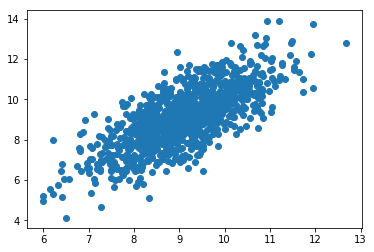

In [227]:
recover = np.matmul(new_dataset, eig_vector.T) # recover the data to the old space
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(recover[:, 0]+mean_val[0], recover[:, 1]+mean_val[1])
plt.show()

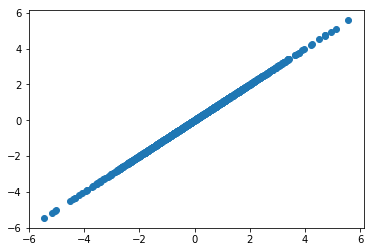

In [228]:
new_dataset2 = np.matmul(dataset - mean_val, eig_vector[:, 1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_dataset2, new_dataset2)
plt.show()

In [229]:
np.cov(new_dataset2, rowvar=0)

array(2.8971349561751865)

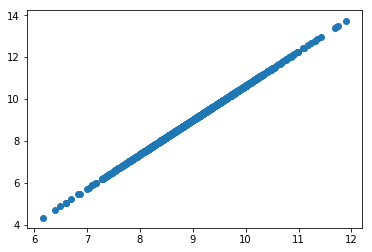

In [230]:
recover2 = np.matmul(new_dataset2.reshape([-1, 1]), eig_vector[:, 1].reshape([1, -1]))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(recover2[:, 0]+mean_val[0], recover2[:, 1]+mean_val[1])
plt.show()

In [231]:
def pca(dataset, n):
    mean_val = dataset.mean(axis=0)
    nor_data = dataset - mean_val
    cov = np.cov(nor_data, rowvar=0)
    eig_vals, eig_vector = np.linalg.eig(cov)
    index_sort = np.argsort(eig_vals)
    prim_eig_vector = eig_vector[:, index_sort[:-(n+1):-1]]
    new_dataset = np.matmul(nor_data, prim_eig_vector)
    return new_dataset

In [232]:
data_test = pca(dataset, 1)

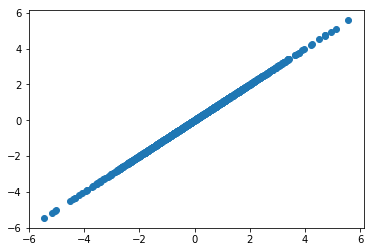

In [233]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_test, data_test)
plt.show()

In [247]:
f = open('secom.data')
dataset = []
for line in f.readlines():
    dataset.append([float(i) for i in line.split(' ')])
dataset = np.array(dataset)

In [253]:
dataset

array([[  3.03093000e+03,   2.56400000e+03,   2.18773330e+03, ...,
                     nan,              nan,              nan],
       [  3.09578000e+03,   2.46514000e+03,   2.23042220e+03, ...,
          2.01000000e-02,   6.00000000e-03,   2.08204500e+02],
       [  2.93261000e+03,   2.55994000e+03,   2.18641110e+03, ...,
          4.84000000e-02,   1.48000000e-02,   8.28602000e+01],
       ..., 
       [  2.97881000e+03,   2.37978000e+03,   2.20630000e+03, ...,
          8.60000000e-03,   2.50000000e-03,   4.35231000e+01],
       [  2.89492000e+03,   2.53201000e+03,   2.17703330e+03, ...,
          2.45000000e-02,   7.50000000e-03,   9.34941000e+01],
       [  2.94492000e+03,   2.45076000e+03,   2.19544440e+03, ...,
          1.62000000e-02,   4.50000000e-03,   1.37784400e+02]])

In [264]:
for i in range(dataset.shape[1]):
    mean_val = np.mean(dataset[~np.isnan(dataset[:, i]), i])
    dataset[np.isnan(dataset[:, i]), i] = mean_val

In [265]:
dataset

array([[  3.03093000e+03,   2.56400000e+03,   2.18773330e+03, ...,
          1.64749042e-02,   5.28333333e-03,   9.96700663e+01],
       [  3.09578000e+03,   2.46514000e+03,   2.23042220e+03, ...,
          2.01000000e-02,   6.00000000e-03,   2.08204500e+02],
       [  2.93261000e+03,   2.55994000e+03,   2.18641110e+03, ...,
          4.84000000e-02,   1.48000000e-02,   8.28602000e+01],
       ..., 
       [  2.97881000e+03,   2.37978000e+03,   2.20630000e+03, ...,
          8.60000000e-03,   2.50000000e-03,   4.35231000e+01],
       [  2.89492000e+03,   2.53201000e+03,   2.17703330e+03, ...,
          2.45000000e-02,   7.50000000e-03,   9.34941000e+01],
       [  2.94492000e+03,   2.45076000e+03,   2.19544440e+03, ...,
          1.62000000e-02,   4.50000000e-03,   1.37784400e+02]])

In [266]:
dataset.shape

(1567, 590)

In [269]:
nor_data = dataset - dataset.mean(axis=0)
cov = np.cov(nor_data, rowvar=0)
eig_vals, eig_vectors = np.linalg.eig(cov)

In [272]:
eig_vals

array([  5.34151979e+07,   2.17466719e+07,   8.24837662e+06,
         2.07388086e+06,   1.31540439e+06,   4.67693557e+05,
         2.90863555e+05,   2.83668601e+05,   2.37155830e+05,
         2.08513836e+05,   1.96098849e+05,   1.86856549e+05,
         1.52422354e+05,   1.13215032e+05,   1.08493848e+05,
         1.02849533e+05,   1.00166164e+05,   8.33473762e+04,
         8.15850591e+04,   7.76560524e+04,   6.66060410e+04,
         6.52620058e+04,   5.96776503e+04,   5.16269933e+04,
         5.03324580e+04,   4.54661746e+04,   4.41914029e+04,
         4.15532551e+04,   3.55294040e+04,   3.31436743e+04,
         2.67385181e+04,   1.47123429e+04,   1.44089194e+04,
         1.09321187e+04,   1.04841308e+04,   9.48876548e+03,
         8.34665462e+03,   7.22765535e+03,   5.34196392e+03,
         4.95614671e+03,   4.23060022e+03,   4.10673182e+03,
         3.41199406e+03,   3.24193522e+03,   2.74523635e+03,
         2.35027999e+03,   2.16835314e+03,   1.86414157e+03,
         1.76741826e+03,

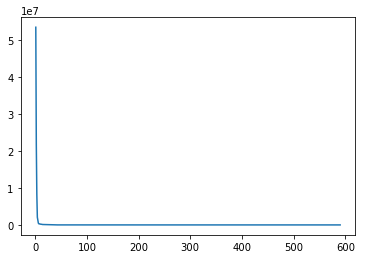

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, len(eig_vals)+1), eig_vals)
plt.show()

In [299]:
for i in range(len(eig_vals)):
    if sum(eig_vals[:i+1])/sum(eig_vals) > 0.99:
        break

In [300]:
i

16

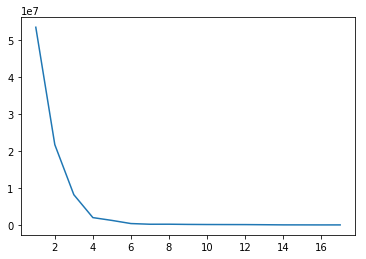

In [304]:
new_data=pca(dataset, i+1)
new_eig_val, _ = np.linalg.eig(np.cov(new_data, rowvar=0))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, len(new_eig_val)+1), new_eig_val)
plt.show()

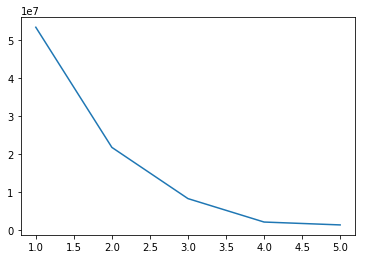

In [306]:
new_data=pca(dataset, 5)
new_eig_val, _ = np.linalg.eig(np.cov(new_data, rowvar=0))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, len(new_eig_val)+1), new_eig_val)
plt.show()